In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Sydney_Data.csv", header=None, na_values = "?")


In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,127.9439,264.9656,68.3481,521.7570,443.6997,195.9648,166.7701,504.2850,104.0226,205.2257,348.0209
1,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,520.4714
2,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,566.0000
3,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,511.7909
4,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,509.8984
...,...,...,...,...,...,...,...,...,...,...,...
341,512.8445,289.4162,8.2501,0.0000,481.9190,305.7098,129.3477,193.8513,58.6420,368.2146,424.2030
342,566.0000,200.9147,96.7240,56.1271,387.5562,470.5309,296.8214,0.0000,204.0235,472.3813,401.1551
343,407.0739,253.7121,8.5925,78.4384,473.9559,504.8171,140.2325,104.9832,50.3513,263.2746,483.9365
344,425.3179,323.9925,90.1540,13.6192,548.5946,566.0000,17.3318,264.3670,172.6011,333.3817,497.6459


In [5]:
df.isnull().sum().sum()

0

# SimpleImputer and DecisionTree

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
df1 = pd.DataFrame(SimpleImputer(strategy = "most_frequent").fit_transform(df))

C:\Users\aragh\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [8]:
df1.head(6)

,0,1,2,3,4,5,6,7,8,9,10
0,127.9439,264.9656,68.3481,521.7570,443.6997,195.9648,166.7701,504.2850,104.0226,205.2257,348.0209
1,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,520.4714
2,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,566.0000
3,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,511.7909
4,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,509.8984
5,446.6611,421.0366,493.1895,566.0000,516.3773,566.0000,566.0000,474.8170,566.0000,0.0000,299.7096


In [9]:
from sklearn.preprocessing import LabelEncoder
for i in range(0,10):
    df1[i]=LabelEncoder().fit_transform(df1[i])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(df1.drop(columns=[0]),df1[0],test_size=0.3)
print(xtrain.shape,xtest.shape)

(242, 10) (104, 10)


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt=DecisionTreeClassifier(criterion="entropy", max_depth=4)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
train_pred = dt.predict(xtrain)
test_pred= dt.predict(xtest)

In [16]:
print("training accuracy", accuracy_score(train_pred, ytrain))
print("testing accuracy", accuracy_score(test_pred, ytest))

training accuracy 0.1859504132231405
testing accuracy 0.057692307692307696


In [17]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'X[2] <= 129.0\nentropy = 7.089\nsamples = 242\nvalue = [4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 37]'),
 Text(0.25, 0.7, 'X[9] <= 529.625\nentropy = 6.423\nsamples = 112\nvalue = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0\n0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0\n1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1\n0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0\n0, 0, 0, 1, 1, 0, 1, 0, 0, 0

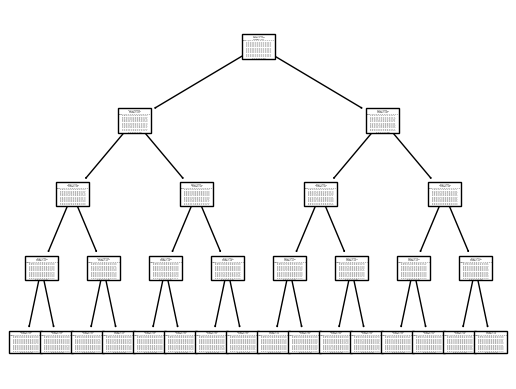

In [18]:
plot_tree(dt)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

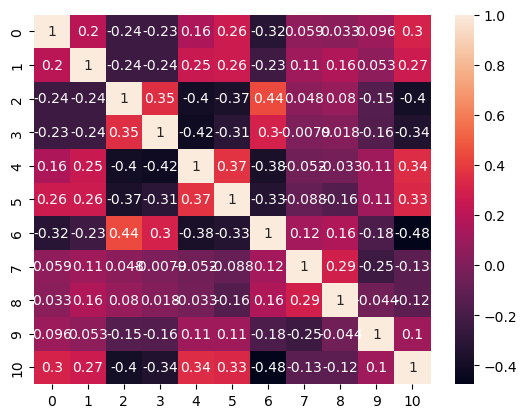

In [20]:
sns.heatmap(np.corrcoef(df1.values.T),annot=True)
 

# Using SVM

In [21]:
from sklearn.svm import SVC

In [22]:
df1

,0,1,2,3,4,5,6,7,8,9,10
0,12,95,106,281,104,24,203,291,86,47,348.0209
1,162,108,86,269,243,75,0,138,255,5,520.4714
2,184,20,251,264,52,0,154,2,285,313,566.0000
3,1,56,214,128,185,4,223,233,285,141,511.7909
4,0,0,182,0,274,0,215,0,285,313,509.8984
...,...,...,...,...,...,...,...,...,...,...,...
341,187,118,16,0,138,50,181,200,30,241,424.2030
342,288,47,133,103,73,108,242,0,230,292,401.1551
343,82,82,17,142,127,138,188,71,25,77,483.9365
344,94,157,127,16,236,256,27,248,214,182,497.6459


In [23]:
model=SVC()
model.fit(xtrain,ytrain)

SVC()

In [24]:
train_predict = model.predict(xtrain)
test_predict = model.predict(xtest)

In [25]:
print("training accuracy", accuracy_score(train_predict,ytrain))
print("testing accuracy", accuracy_score(test_predict,ytest))

training accuracy 0.15289256198347106
testing accuracy 0.15384615384615385


# LinearRegression

In [26]:
import matplotlib.pyplot as plt

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [29]:
model.fit(xtrain, ytrain)

LinearRegression()

In [30]:
print(model.coef_)

[ 0.00263995  0.04557448 -0.07464222 -0.06171747  0.13487553 -0.21550722
  0.12440321  0.08144947  0.08883809  0.14754761]


In [31]:
print(model.intercept_)

77.81013522534698


In [32]:
predictions = model.predict(xtest)

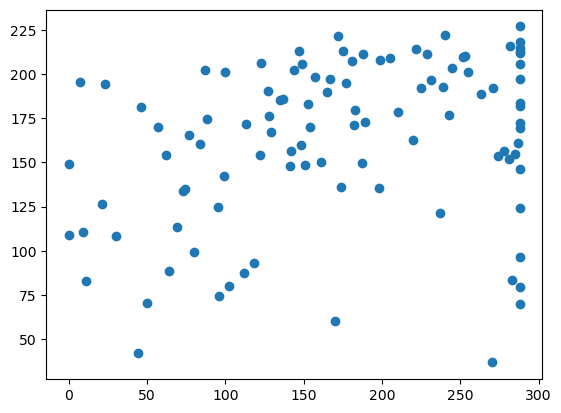

In [33]:
plt.scatter(ytest, predictions)

(array([ 3.,  5., 11., 23., 19., 15., 12., 10.,  1.,  5.]),
 array([-188.70825928, -146.50948604, -104.3107128 ,  -62.11193956,
         -19.91316631,   22.28560693,   64.48438017,  106.68315341,
         148.88192665,  191.0806999 ,  233.27947314]),
 <BarContainer object of 10 artists>)

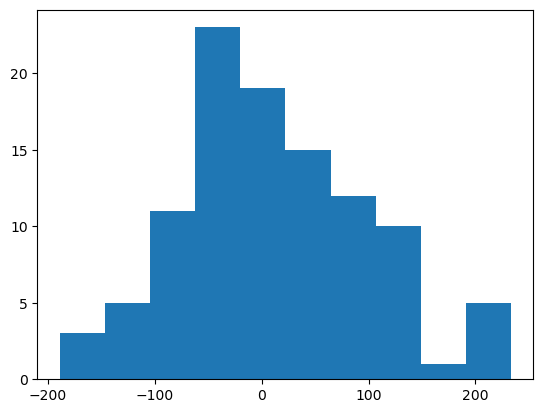

In [34]:
plt.hist(ytest - predictions)


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
ypred = model.predict(xtest)

In [37]:
mse = mean_squared_error(ytest, ypred)

In [38]:
mse

7559.883785585581

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2 = r2_score(ytest, ypred)

In [41]:
r2

0.02176030110561733

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
model = LogisticRegression()

In [44]:
model.fit(xtrain, ytrain)

C:\Users\aragh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
score = model.score(xtest, ytest)

In [46]:
score

0.04807692307692308

# RandomForest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [48]:
model = RandomForestRegressor(n_estimators=100)

In [49]:
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [50]:
ypred = model.predict(xtest)

In [51]:
r2_score = r2_score(ytest, ypred)
print('R-squared score:', r2_score)


R-squared score: 0.09619967782384942


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [53]:
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

In [54]:
svc = SVC()
grid_search = GridSearchCV(svc, param_grid=param_grid)

In [55]:
grid_search.fit(xtrain, ytrain)

C:\Users\aragh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]})

In [56]:
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 0.1}
